# Parameters tuning
Find the optimal parameter for each algorithm


In [1]:
import os
os.chdir('..')
os.getcwd()

'/Users/antonismand/Desktop/Personalized-News-Recommendation'

In [2]:
%load_ext autoreload
%autoreload 2

from evaluator import evaluate
from bandits import *
from matplotlib import pyplot as plt
import numpy as np

In [3]:
%%time
import dataset
files = ("dataset/R6/ydata-fp-td-clicks-v1_0.20090502",'dataset/R6/ydata-fp-td-clicks-v1_0.20090503')
dataset.get_yahoo_events(files)

7646058 events with 62 articles
CPU times: user 3min 24s, sys: 4.84 s, total: 3min 29s
Wall time: 3min 29s


In [8]:
_, deploy_ctr = evaluate(Egreedy(1))
rnd_ctr = deploy_ctr[-1]

Egreedy (ε=1)       0.0308    14.2s


In [9]:
def plot_results(tests):
    
    learn_ctrs = []
    deploy_ctrs = []

    for test in tests:
        learn, deploy = evaluate(test)
        learn = learn[1000:]
        if hasattr(test, 'e'):
            plt.plot(learn, label="ε={}".format(test.e))
        else:
            plt.plot(learn, label="α={}".format(test.alpha))
        
        learn_ctrs.append(learn[-1]/rnd_ctr)   
        deploy_ctrs.append(deploy[-1]/rnd_ctr) 

    plt.title("Learning bucket")
    plt.xlabel("T")
    plt.ylabel("CTR")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

    
    if hasattr(test, 'e'):
        param_values = [x.e for x in tests]
        plt.xlabel("ε")
    else:
        param_values = [x.alpha for x in tests]
        plt.xlabel("α")
    plt.plot(param_values, learn_ctrs,marker='o')
    plt.title('Learning bucket')
    plt.ylabel("CTR lift")
    plt.show()


    if hasattr(test, 'e'):
        plt.xlabel("ε")
    else:
        plt.xlabel("α")
    plt.ylabel("CTR lift")
    plt.plot(param_values, deploy_ctrs,marker='o')
    plt.title('Deployment bucket')
    plt.show()

    best_idx = np.argmax(deploy_ctrs)
    print('Best parameter:',tests[best_idx].algorithm)

## Results for E-greedy

Egreedy (ε=0.1)     0.0397    19.9s
Egreedy (ε=0.2)     0.0407    21.7s
Egreedy (ε=0.3)     0.0391    21.7s
Egreedy (ε=0.4)     0.0386    21.3s
Egreedy (ε=0.5)     0.0373    20.6s
Egreedy (ε=0.6)     0.0349    19.7s
Egreedy (ε=0.7)     0.0322    19.1s
Egreedy (ε=0.8)     0.0343    19.4s
Egreedy (ε=0.9)     0.0335    19.6s


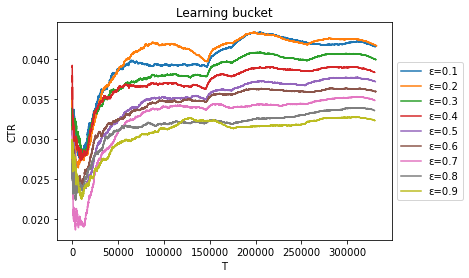

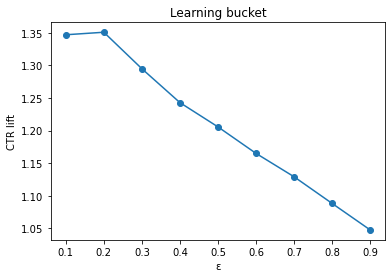

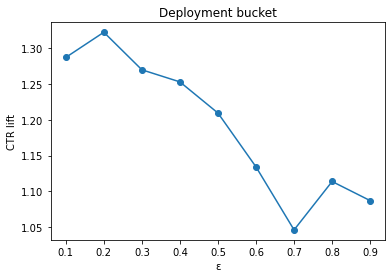

Best parameter: Egreedy (ε=0.2)
CPU times: user 3min 2s, sys: 1.31 s, total: 3min 3s
Wall time: 3min 3s


In [10]:
%%time
epsilon_values = np.arange(0.1,1,0.1)
tests = [Egreedy(e) for e in epsilon_values]
plot_results(tests)

## Results for UCB 

UCB1 (α=0.1)        0.0428    47.0s
UCB1 (α=0.3)        0.0418    47.0s
UCB1 (α=0.5)        0.04      47.2s
UCB1 (α=0.7)        0.0386    48.2s
UCB1 (α=0.9)        0.0368    46.8s
UCB1 (α=1.1)        0.0388    52.1s
UCB1 (α=1.3)        0.0375    49.6s


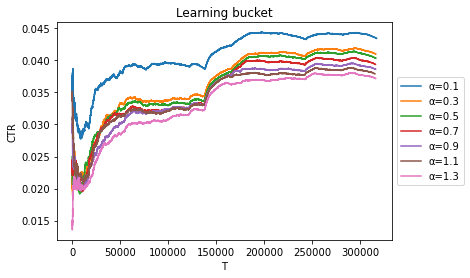

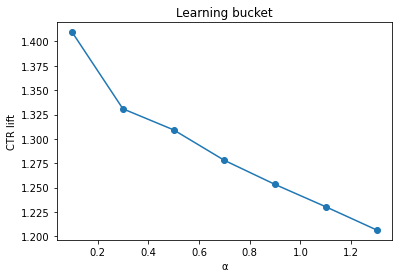

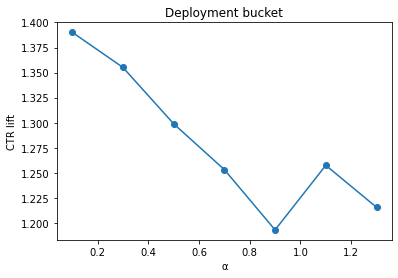

Best parameter: UCB1 (α=0.1)
CPU times: user 5min 36s, sys: 2.51 s, total: 5min 39s
Wall time: 5min 38s


In [11]:
%%time
alpha_values = np.arange(0.1,1.4,0.2)
tests = [Ucb1(a) for a in alpha_values]
plot_results(tests)

## Results for LinUCB (context = user+item)

LinUCB (α=0.1, context:both)0.0506    7.9m
LinUCB (α=0.3, context:both)0.0484    7.7m
LinUCB (α=0.5, context:both)0.0499    7.6m
LinUCB (α=0.7, context:both)0.0489    8.1m
LinUCB (α=0.9, context:both)0.0479    8.0m
LinUCB (α=1.1, context:both)0.0469    7.8m
LinUCB (α=1.3, context:both)0.0458    8.3m


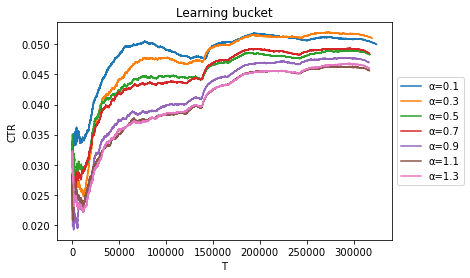

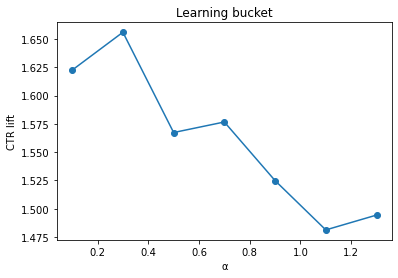

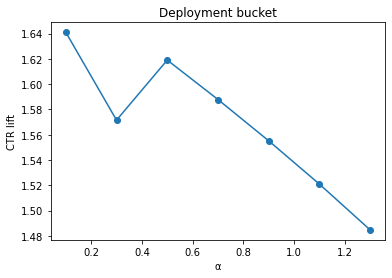

Best parameter: LinUCB (α=0.1, context:both)
CPU times: user 3h 25min 4s, sys: 2h 29min 25s, total: 5h 54min 30s
Wall time: 55min 21s


In [12]:
%%time
alpha_values = np.arange(0.1,1.4,0.2)
tests = [LinUCB(a, context="both") for a in alpha_values]
plot_results(tests)

## Results for LinUCB (context = user)

LinUCB (α=0.1, context:user)0.05      6.0m
LinUCB (α=0.3, context:user)0.0502    6.1m
LinUCB (α=0.5, context:user)0.0486    6.2m
LinUCB (α=0.7, context:user)0.0494    6.0m
LinUCB (α=0.9, context:user)0.0465    6.1m
LinUCB (α=1.1, context:user)0.0464    5.9m
LinUCB (α=1.3, context:user)0.0438    5.9m


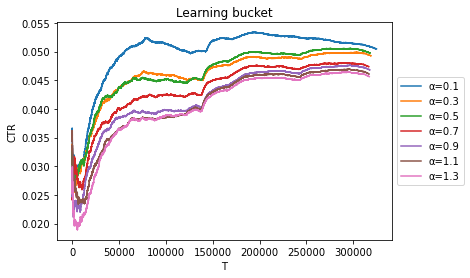

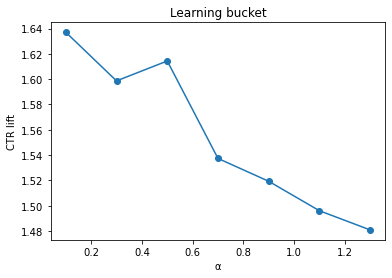

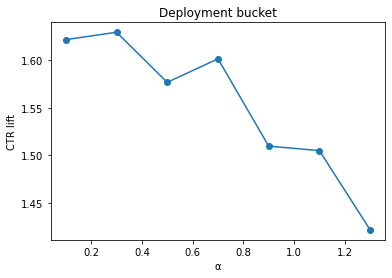

Best parameter: LinUCB (α=0.3, context:user)
CPU times: user 2h 33min 21s, sys: 1h 11min 15s, total: 3h 44min 37s
Wall time: 42min 8s


In [13]:
%%time
alpha_values = np.arange(0.1,1.4,0.2)
tests = [LinUCB(a, context="user") for a in alpha_values]
plot_results(tests)